<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/LoanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')

In [10]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
y=df['Personal Loan'].values

In [12]:
df.drop(columns=['ID','ZIP Code','Personal Loan'],axis=1,inplace=True)

In [13]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [14]:
data=np.array(df)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(data)

array([[-1.77441684, -1.66607847, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09633022, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44516316, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.40445376,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV
parameter={'C':[1,1.5,2,2.5,3],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['auto','scale']}


In [24]:
from sklearn.svm import SVC
svc=SVC();
model=GridSearchCV(svc,parameter,cv=5,scoring='accuracy')

In [25]:
model.fit(X_train,y_train)
print(model.best_estimator_)

SVC(C=2.5, gamma='auto')


In [26]:
y_pred=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy Score: 0.985
Precision Score: 0.9787234042553191
Recall Score: 0.8761904761904762
F1 Score: 0.9246231155778895
Confusion Matrix:
 [[893   2]
 [ 13  92]]


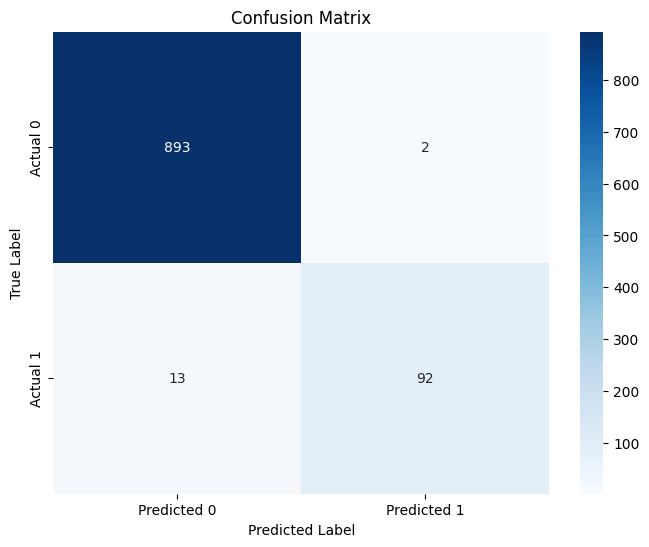

In [34]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
